# Protein Level Analysis

In [1]:
library(readxl)
library(sets)
library(tidyverse)
library(limma)
library(gplots)
library(ggplot2)
library(dplyr)
library(ROSE)
library(scutr)
library(svglite)
library(ComplexHeatmap)


# set working directory
#setwd('/lustre/home/reynaj/Projects/20241011.kevin_byrd.ibd_nulisa')
setwd('/home/reynaj/projects/kevin_byrd/20241011.kevin_byrd.ibd_nulisa')

# set the output directory
outdir <- "results/specimen_focused/limma/uc_only/"

# Check if the directory exists, and create it if it doesn't
if (!dir.exists(outdir)) {
  dir.create(outdir)
}

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ forcats::%>%()           masks stringr::%>%(), dplyr::%>%(), purrr::%>%(), tidyr::%>%(), tibble::%>%(), sets::%>%()
✖ lubridate::as.interval() masks sets::as.interval()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::interval()    masks sets::interval()
✖ lubridate::is.interval() masks sets::is.interval()
✖ dplyr::lag()             masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to for

## Load the datasets

In [2]:
# load protein data
fn = "results/specimen_focused/comp_data/protein_levels.npq.tsv"
protein_data <- read.table(fn, header=TRUE, check.names=FALSE, sep = "\t")

# load clinical data
fn = "results/specimen_focused/comp_data/clinical_data.tsv"
clinical_data <- read.table(fn, header=TRUE, sep="\t")

# remove alamar samples completely
clinical_data <- clinical_data[clinical_data$ibd_diagnosis != "Alamar_Sample_Control",] 
protein_data <- protein_data[, clinical_data$sample_id]

# extract just CD and UC data
focus_idxs <- which(clinical_data$ibd_diagnosis %in% c("UC"))
clinical_data = clinical_data[focus_idxs,]
protein_data = protein_data[,focus_idxs]

## Run hierarchical clustering

pdf 
  2

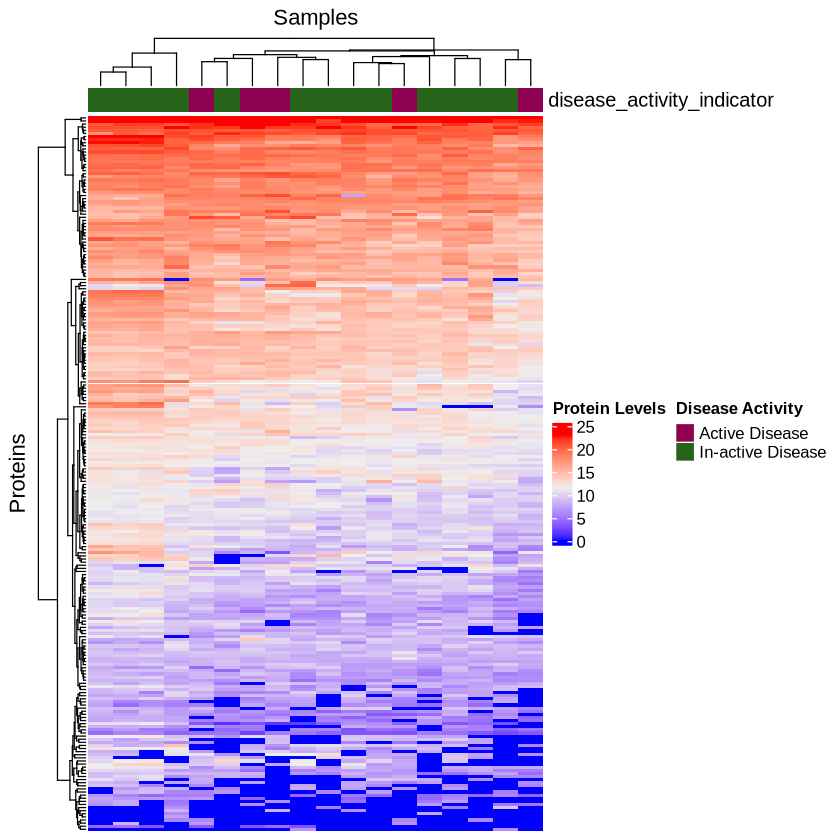

In [3]:
# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=RdGy&n=11

# Create a heatmap annotation for the diagnosis
ha_da_idx <- HeatmapAnnotation(disease_activity_indicator = clinical_data$disease_activity_indicator, 
                        name = "Disease Activity",
                        col = list(disease_activity_indicator = c("In-active Disease" = "#276419", "Active Disease" = "#8e0152")),
                        annotation_legend_param = list(title="Disease Activity"))

ht <- Heatmap(as.matrix(protein_data),
        name = "Protein Levels",
        row_title = "Proteins",
        column_title = "Samples",
        cluster_rows = TRUE,
        cluster_columns = TRUE,
        show_row_names = FALSE,
        show_column_names = FALSE,
        column_labels = clinical_data$ibd_indicator,
        top_annotation = ha_da_idx)

# Draw the heatmap and add a main title
ht_list <- draw(ht,
                heatmap_legend_side = "right", 
                annotation_legend_side = "right")
ht_grob <- grid.grabExpr(draw(ht_list))

# Save the plot as SVG without the textLength attribute
svglite(file.path(outdir, "samples.uc_data.hierarchical_clustering.svg"), fix_text_size = FALSE)
grid.draw(ht_grob)
dev.off()

In [4]:
outdir

[1] "results/specimen_focused/limma/uc_only/"